# COMP90086 Workshop 2

This workshop aims to introduce you to some of the libraries we will use, including Numpy, Matplotlib and OpenCV. You will learn some basic operations on arrays and images.

Table of Contents
- [Numpy (Numerical Python)](#Numpy)
    - Array creation
    - Inspecting an array
    - Indexing/slicing
    - Array manipulation
    - Basic operators
    
- [Matplotlib (Plotting and Visualization)](#Matplotlib)
    - Basic plots
    - Subplot
    
- [OpenCV (Computer Vision)](#OpenCV)
    - Read image
    - Show image
    - Crop image
    - Resize image
    - Write image

# Numpy

Numpy is a numerical library with many useful functions for arrays.

First, import the library. It is usually called as `np` to simplify the reference.

In [1]:
import numpy as np

## (1) Array creation

In [2]:
a = np.array([0, 1, 2, 3, 4])
print(a)

[0 1 2 3 4]


In [3]:
b = np.array([[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]], dtype = float)
print(b)

[[0. 1. 2. 3. 4.]
 [5. 6. 7. 8. 9.]]


In [4]:
c = np.array([[1, 6], [2, 7], [3, 8], [4, 9], [5, 10]], dtype = int)
print(c)

[[ 1  6]
 [ 2  7]
 [ 3  8]
 [ 4  9]
 [ 5 10]]


### Create other useful arrays with functions:

In [5]:
array_size=(2,3)
# The repr() function returns a printable representation of the given object.
print(repr(np.zeros(array_size)))          # Creates an array filled with zeros
print(repr(np.ones(array_size)))           # An array of ones
print(repr(np.eye(3)) )                    # The identity matrix I (needs 1 integer for square size)
print(repr(np.full(array_size, 5)))        # Fills with an element
print(repr(np.random.random(array_size)) ) # Random between 0 and 1
print(repr(np.arange(1,11) ))              # evenly spaced values within a given interval
print(repr(np.empty(array_size)))          # empty array (arbitrary values)

array([[0., 0., 0.],
       [0., 0., 0.]])
array([[1., 1., 1.],
       [1., 1., 1.]])
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])
array([[5, 5, 5],
       [5, 5, 5]])
array([[0.17455802, 0.45495125, 0.03411848],
       [0.17901273, 0.17766103, 0.37656812]])
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
array([[0.17455802, 0.45495125, 0.03411848],
       [0.17901273, 0.17766103, 0.37656812]])


## (2) Inspecting an array

In [6]:
print(c.dtype)  # data type of array elements
print(c.shape)  # lengths of each dimension
print(c.ndim)   # number of dimensions
print(c.size)   # number of elements in the array)

int64
(5, 2)
2
10


### Change the type to other type:

In [7]:
#astype() function takes an argument which is the target data type
print(repr(a))
print(repr(a.astype(np.float16)))
print(repr(b))
print(repr(b.astype(np.int8)))

array([0, 1, 2, 3, 4])
array([0., 1., 2., 3., 4.], dtype=float16)
array([[0., 1., 2., 3., 4.],
       [5., 6., 7., 8., 9.]])
array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]], dtype=int8)


## (3) Indexing/slicing

In [8]:
b[0,1]                   # select a single element (at row 0, column 1)

np.float64(1.0)

In [9]:
a[0:4]                   # select a slice [start:end]

array([0, 1, 2, 3])

In [10]:
a[0:4:2]                 # select a slice with a stride [start:end:step]

array([0, 2])

In [11]:
a[::-1]                  # select all elements in reverse

array([4, 3, 2, 1, 0])

In [12]:
b[:,2]                   # select all elements along the first axis (all rows) and only the elements with index 2 along the second axis

array([2., 7.])

In [13]:
a[:, np.newaxis]         # insert a new axis (here: convert a 1D array to a column vector)

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [14]:
a[a>2]                   # boolean indexing

array([3, 4])


## (4) Array manipulation

In [15]:
b = np.array([[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]], dtype = float)

b.ravel()                # flatten the array (or np.ravel)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [16]:
b[0, :3]=10              # change elements of an array
print(b)

[[10. 10. 10.  3.  4.]
 [ 5.  6.  7.  8.  9.]]


In [17]:
b.reshape(5,2)           # change shape, but don't change values

array([[10., 10.],
       [10.,  3.],
       [ 4.,  5.],
       [ 6.,  7.],
       [ 8.,  9.]])

In [18]:
np.resize(b, (6,2))      # create a new array with a different shape

array([[10., 10.],
       [10.,  3.],
       [ 4.,  5.],
       [ 6.,  7.],
       [ 8.,  9.],
       [10., 10.]])

In [19]:
np.append(a, [1, 1])     # append values to the end of an array

array([0, 1, 2, 3, 4, 1, 1])

In [20]:
np.insert(a, 2, [1, 1])  # insert values at a given location

array([0, 1, 1, 1, 2, 3, 4])

In [22]:
np.delete(a, [0,2])      # delete elements at given locations

array([1, 3, 4])

In [25]:
np.concatenate((b, b+10), axis = 0)  # concatenate arrays

array([[10., 10., 10.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [20., 20., 20., 13., 14.],
       [15., 16., 17., 18., 19.]])

In [26]:
np.r_[b, b + 10]         # shorthand: concatenate arrays along their first axis (row-wise)

array([[10., 10., 10.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [20., 20., 20., 13., 14.],
       [15., 16., 17., 18., 19.]])

In [27]:
np.c_[b, b + 10]         # shorthand: concatenate arrays along their second axis (column-wise)

array([[10., 10., 10.,  3.,  4., 20., 20., 20., 13., 14.],
       [ 5.,  6.,  7.,  8.,  9., 15., 16., 17., 18., 19.]])

In [28]:
np.split(b, 2, axis = 0) # split an array into sub-arrays

[array([[10., 10., 10.,  3.,  4.]]), array([[5., 6., 7., 8., 9.]])]

In [29]:
aa = a.copy()            # make a deep copy of the array
aa.fill(0)
print(a)
print(aa)

[0 1 2 3 4]
[0 0 0 0 0]



## (5) Basic operations

### Element-wise arithmetic

In [30]:
a = np.array([0, 1, 2, 3, 4])
b = np.array([[0, 1, 2, 3, 4], [5, 6, 7, 8, 9]], dtype = float)
d = np.array([5, 6, 7, 8, 9])

In [31]:
a + d                # element-wise addition (or np.add)

array([ 5,  7,  9, 11, 13])

In [ ]:
a - d                # element-wise subtraction (or np.subtract)

array([-5, -5, -5, -5, -5])

In [ ]:
a * d                # element-wise multiplication (or np.multiply)

array([ 0,  6, 14, 24, 36])

In [ ]:
a / d                # element-wise division (or np.divide)

array([0.        , 0.16666667, 0.28571429, 0.375     , 0.44444444])

### Aggregation

In [ ]:
b.sum()              # sum elements

45.0

In [ ]:
b.min()              # minimum element

0.0

In [ ]:
b.max()              # maximum element

9.0

In [ ]:
b.mean()             # mean of elements

4.5

### Element-wise comparison

In [ ]:
a == a               # element-wise comparison

array([ True,  True,  True,  True,  True])

In [ ]:
b < 2                # element-wise comparison

array([[ True,  True, False, False, False],
       [False, False, False, False, False]])

### Array-level equality

In [ ]:
np.array_equal(a, b) # check whether arrays have the same shape and elements

False


### Linear algebra

In [ ]:
b.T                  # reverse the array dimensions (or np.transpose)

array([[0., 5.],
       [1., 6.],
       [2., 7.],
       [3., 8.],
       [4., 9.]])

In [ ]:
a.dot(a)             # dot product (or np.dot)

30

In [ ]:
b @ c                # matrix multiplication (or np.matmul)

array([[ 40.,  90.],
       [115., 290.]])

In [ ]:
x = c.T @ c
np.linalg.inv(x)     # matrix inverse

array([[ 0.264, -0.104],
       [-0.104,  0.044]])

In [ ]:
b.trace()            # trace of a matrix

6.0

In [ ]:
np.eye(3)            # identity matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])


### Universal functions (ufuncs)

In [ ]:
np.exp(a)            # exponential function

array([ 1.        ,  2.71828183,  7.3890561 , 20.08553692, 54.59815003])

In [ ]:
np.sin(a)            # sine function

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ])

In [ ]:
np.log(c)            # natural logarithm

array([[0.        , 1.79175947],
       [0.69314718, 1.94591015],
       [1.09861229, 2.07944154],
       [1.38629436, 2.19722458],
       [1.60943791, 2.30258509]])

In [ ]:
np.abs(-b)           # absolute value

array([[0., 1., 2., 3., 4.],
       [5., 6., 7., 8., 9.]])

In [ ]:
np.power(b, 3)       # raise to a power

array([[  0.,   1.,   8.,  27.,  64.],
       [125., 216., 343., 512., 729.]])

# Matplotlib

Matplotlib is a plotting library. `matplotlib.pyplot` exposes a stateful, easy to use, plotting system

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

### Plotting

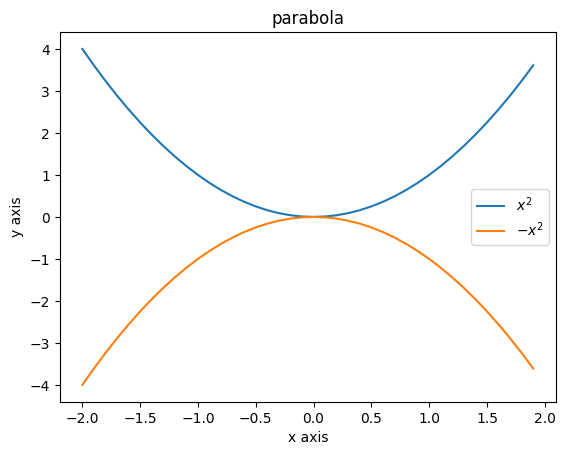

In [ ]:
x = np.arange(-2, 2,0.1)
y_1 = np.power(x,2)
y_2 = -np.power(x,2)

plt.plot(x, y_1,label=r'$x^2$')
plt.plot(x, y_2,label=r'$-x^2$')

plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('parabola')
plt.legend()

plt.show()

plt.show()

### Subplots

put different plots in the same figure

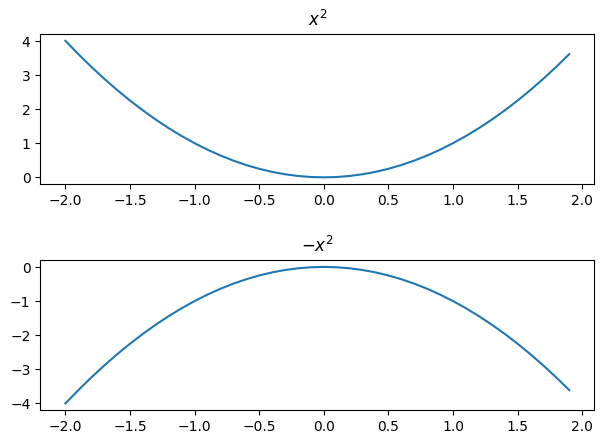

In [ ]:
# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_1)
plt.title(r'$x^2$')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_2)
plt.title(r'$-x^2$')

# Specific spacing between subplots
plt.tight_layout(pad=2.0)

# Show the figure.
plt.show()

# OpenCV

OpenCV is apopular computer vision library. It contains many powerful tools for computer vision tasks, such as reading, writing, showing and maniputlating images and videos.

In [32]:
import cv2
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

Are you experiencing `ModuleNotFoundError: No module named 'cv2'` ？

Solutions might include:
1. Make sure you have followed the installation guide in the ‘Week 1: Software installation’.
2. It might cause by launching the Jupyter Notebook in Anaconda with the default setting. You could try to reopen the Jupyter Notebook with the "CV" environment to see if it could solve this problem.
3. If still have such issues after reopen with the “CV" environment, you might try to upgrade anaconda to the latest version and also make sure are using python 3.7 version.

In [33]:
# python version
import sys
print(sys.version)

3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]


4. Still not solved? Try the virtualenv/pip installation or use Colab as a last resort, OpenCV is included on there by default.

## (1) Read  Image



`imread`:  read in an image from a filepath.

In [37]:
rootpath='./'
rgb_test = cv2.imread(os.path.join(rootpath, "rgbtest.png"))

Images in OpenCV are represented as numpy arrays: 1st dim-number of rows (height of image), 2nd dim - number of columns (width of image), 3rd dim- number of channels

In [38]:
type(rgb_test), rgb_test.shape, rgb_test.dtype

(numpy.ndarray, (227, 341, 3), dtype('uint8'))

### Channel order in OpenCV
The order of channels is BGR: the 1st, 2nd and 3rd channel are the pixel values of blue channel, green channel and red channel of an image, respectively. We can verify channel order by reading the pixels of an image that contains blue, green and red regions.

We will show image by Matplotlib, which assumes images are in the RGB format. However, OpenCV assumes that images are in the BGR format.

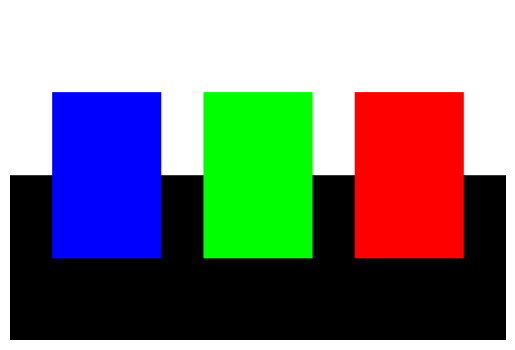

In [39]:
# the original RGB image but show using BGR format
plt.imshow(rgb_test)
plt.axis('off')
plt.show()

Here's what's happening:

rgb_test is assumed to be an image in RGB format.

If you read this image using OpenCV, it would be interpreted in BGR order.

When you pass this image to plt.imshow(rgb_test), Matplotlib expects the image to be in RGB format, so it may display the colors incorrectly.

### Show image
We will show image by Matplotlib, which assumes images are in the **RGB** format, but OpenCV assumes that images are in the **BGR** format. So, we'll convert colors before showing the image. Let's make a function to do this.

In [40]:
def imshow(image, *args, **kwargs):
    if len(image.shape) == 3:
      # Height, width, channels
      # Assume BGR, do a conversion since
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
      # Height, width - must be grayscale
      # convert to RGB, since matplotlib will plot in a weird colormap (instead of black = 0, white = 1)
      image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # Draw the image
    plt.imshow(image, *args, **kwargs)
    # We'll also disable drawing the axes and tick marks in the plot, since it's actually an image
    plt.axis('off')
    # Make sure it outputs
    plt.show()

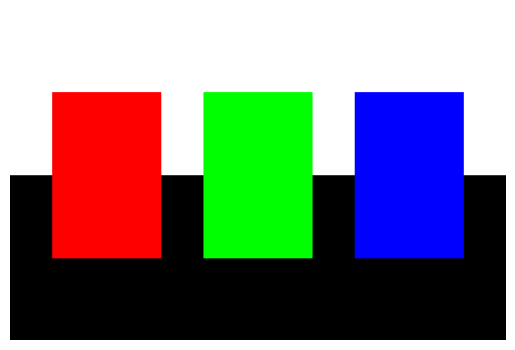

In [41]:
# use our imshow fuction to see the original 'rgbtest.png'
imshow(rgb_test)

In [42]:
# Convert from BGR to RGB
image_rgb = cv2.cvtColor(rgb_test, cv2.COLOR_BGR2RGB)

In [43]:
# check the pixel value of the red region:
# the 1rd channel(red channel) is maximum for red region
image_rgb[100,100,:]

array([255,   0,   0], dtype=uint8)

In [44]:
# check the pixel value of the green region:
# the 2nd channel (green channel) is maximum for green region
image_rgb[100,200,:]

array([  0, 255,   0], dtype=uint8)

In [ ]:
# check the pixel value of the blue region:
# the 3st channel (blue channel) is maximum for blue region
image_rgb[100,300,:]

array([  0,   0, 255], dtype=uint8)

In [45]:
# check the pixel value of the white region:
# all channels have maximum values (Upper-left most point)
image_rgb[0,0,:]

array([255, 255, 255], dtype=uint8)

In [ ]:
# check the pixel value of the black region:
# all channels have minimum values (Lower-right most point)
image_rgb[226,340,:]

array([0, 0, 0], dtype=uint8)

Let's see another example!

In [46]:
bird= cv2.imread(os.path.join(rootpath, "kodim23.png"))
type(bird), bird.shape, bird.dtype

(numpy.ndarray, (512, 768, 3), dtype('uint8'))

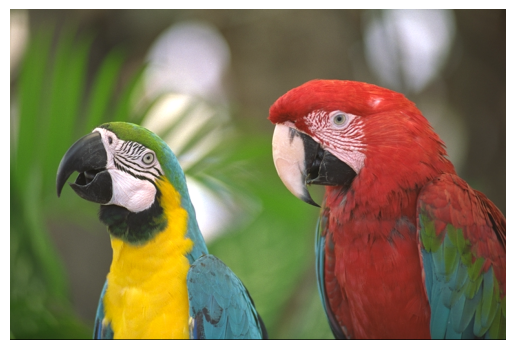

In [47]:
# the original image
imshow(bird)

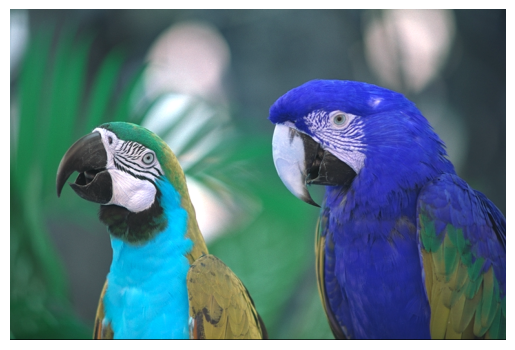

In [48]:
# the original RGB image but show using BGR format
plt.imshow(bird)
plt.axis('off')
plt.show()

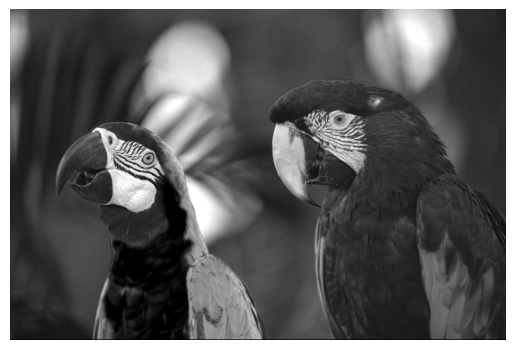

In [49]:
imshow(bird[:,:,0]) # show blue channel. lighter pixel: larger value

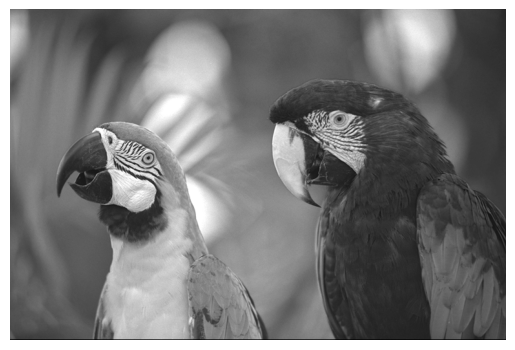

In [50]:
imshow(bird[:,:,1]) # show green channel

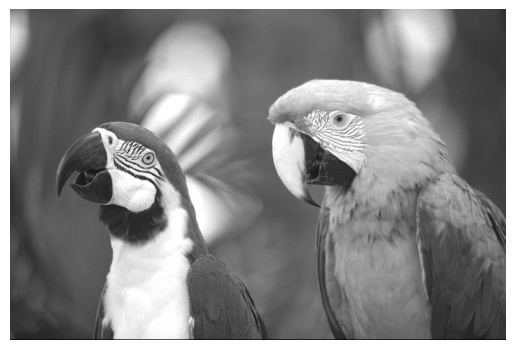

In [51]:
imshow(bird[:,:,2]) # show red channel

## (2) Crop image

### Crop any region by matrix index


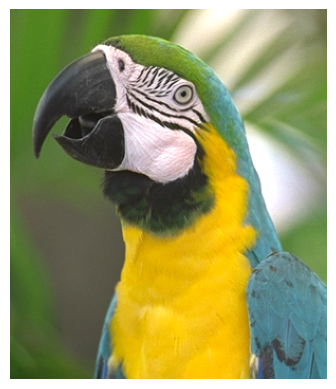

In [52]:
crop_1=bird[150:500,50:350,:] # blue sky has high value in the first dimesion (blue channel)
imshow(crop_1)

###  Crop center region of an image


In [ ]:
# we assume that crop_size is the same for both width and height. we can set different values.
def crop_center(image, crop_size):
    height=image.shape[0]
    width=image.shape[1]
    upper_crop=(height-crop_size)//2
    left_crop=(width-crop_size)//2
    return image[upper_crop:upper_crop+crop_size,left_crop:left_crop+crop_size,:]

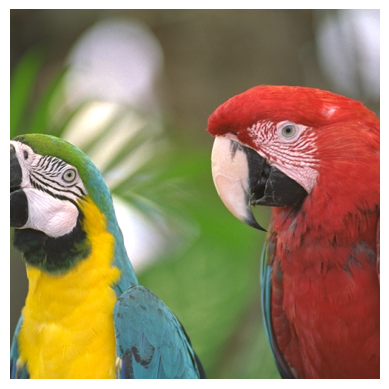

In [ ]:
center_crop=crop_center(bird,500)
imshow(center_crop)

## (3) Resize image

using `resize`. This needs the output size. Note that these are image sizes, which are expressed as (width, height), NOT to be confused with their shape. Different resizing methods can have different results

In [ ]:
image_height, image_width, image_num_channels = rgb_test.shape
new_height = image_height//10
new_width = image_width//10

# nearest-neighbor interpolation
resize_img1= cv2.resize(rgb_test, (new_width, new_height),interpolation = cv2.INTER_NEAREST)

# bicubic interpolation over 4×4 pixel neighborhood
resize_img2= cv2.resize(rgb_test, (new_width, new_height),interpolation = cv2.INTER_CUBIC)

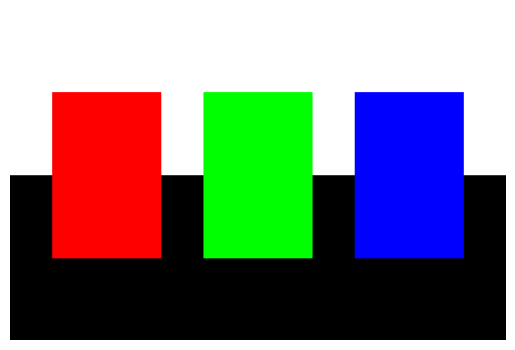

(227, 341, 3)


In [ ]:
# (To display it in the browser, the image is being scaled down anyway, so resizing it 10 x 10 will not be obvious)
imshow(rgb_test)
print(rgb_test.shape)

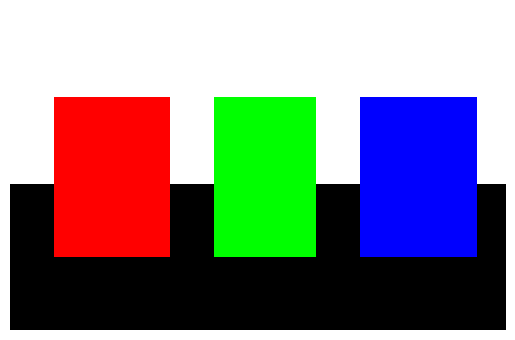

(22, 34, 3)
INTER_NEAREST


In [ ]:
imshow(resize_img1)
print(resize_img1.shape)
print('INTER_NEAREST')

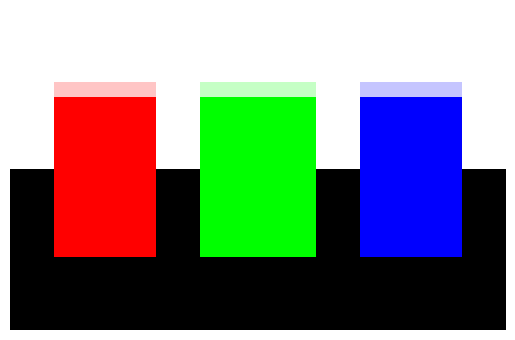

(22, 34, 3)
INTER_CUBIC


In [ ]:
imshow(resize_img2)
print(resize_img2.shape)
print('INTER_CUBIC')

In [ ]:
image_height, image_width, image_num_channels = bird.shape
new_height = image_height//10
new_width = image_width//10

resize_img3= cv2.resize(bird, (new_width, new_height),interpolation = cv2.INTER_NEAREST)

resize_img4= cv2.resize(bird, (new_width, new_height),interpolation = cv2.INTER_CUBIC)

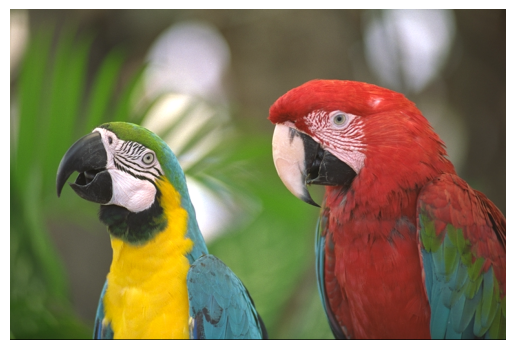

(512, 768, 3)


In [ ]:
imshow(bird)
print(bird.shape)

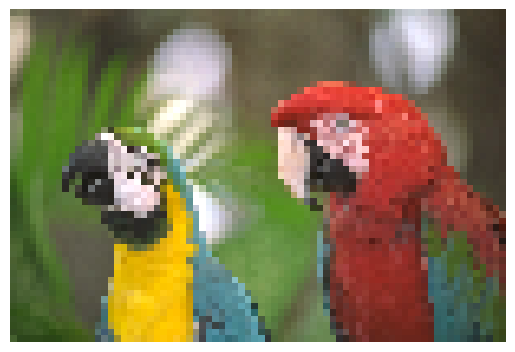

(51, 76, 3)
INTER_NEAREST


In [ ]:
imshow(resize_img3)
print(resize_img3.shape)
print('INTER_NEAREST')

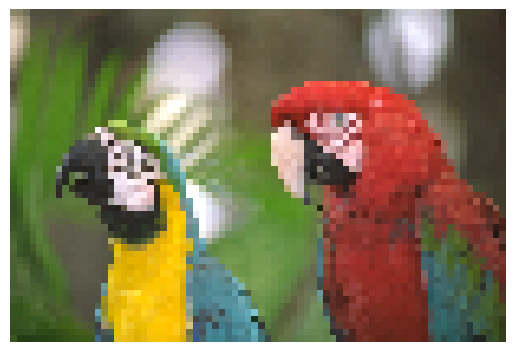

(51, 76, 3)
INTER_CUBIC


In [ ]:
imshow(resize_img4)
print(resize_img4.shape)
print('INTER_CUBIC')

## (4) Write Image

The `imwrite` function can write out an image. Let's write out the image we just made, so we can use it later!

In [ ]:
rootpath='./.'
import os
output_path = os.path.join(rootpath, "resize_bird.jpeg")
cv2.imwrite(output_path, resize_img3)

True

We should be able to read that image directly from the file. Let's try!

Read file of shape: (51, 76, 3) type uint8


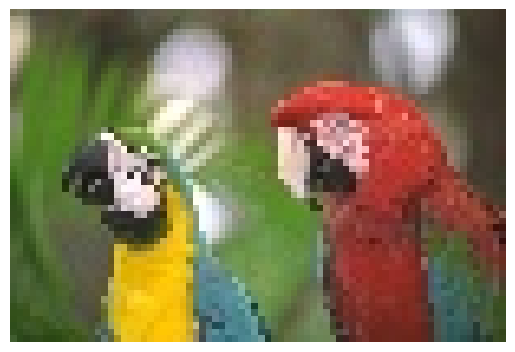

In [ ]:
test_read_output = cv2.imread(output_path)
print("Read file of shape:",test_read_output.shape, "type",test_read_output.dtype)
imshow(test_read_output)

Everything works as expected!

#  Exercise

(1) Read the bird image

(2) Resize the image to (224,224) using bicubic interpolation method.

(3) crop the center region of the image. The crop size is 128 for width and 156 for height.

(4) Set the red channel of the crop image to be the average value of the green channel and blue channel for each pixel.

(5) put the  images in step 1-4 in different plots of a figure. Set up a subplot grid with height 2 and width 2.

(6) A camera with a sensor size of 20 x 30 mm (which corresponds to a 200 x 300 pixel image) is aligned with a flat surface. An object which is 12 cm tall is placed at a distance of 60 cm from the camera to produce the image shown below. The top of the object is exactly aligned with the top edge of the image (the object is 100px high in the image). You can assume the optical centre of the camera is in the centre of the image. What is the focal length of the camera?

<img src="https://github.com/1uoyuuu/COMP90086-CV/blob/main/tutorial/week2/focal.png?raw=1" style="height:400px">

(1) Read the bird image

In [60]:
import cv2
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

rootpath='./'
bird= cv2.imread(os.path.join(rootpath, "kodim23.png"))

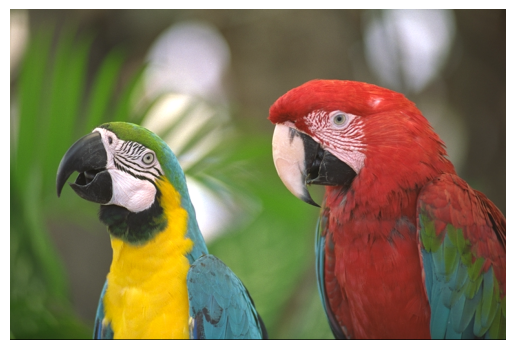

In [56]:
imshow(bird)

(2) Resize the image to (224,224) using bicubic interpolation method.


In [61]:
def convey_img(image, *args, **kwargs):
    if len(image.shape) == 3:
      # Height, width, channels
      # Assume BGR, do a conversion since
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
      # Height, width - must be grayscale
      # convert to RGB, since matplotlib will plot in a weird colormap (instead of black = 0, white = 1)
      image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # Draw the image
    return image

In [64]:
new_width=224
new_height=224

resize_img= cv2.resize(bird, (new_width, new_height),interpolation = cv2.INTER_CUBIC)

(3) Crop the center region of the resized image. The crop size is 128 for width and 156 for height.


In [67]:
def crop_center(image, crop_size_w, crop_size_h): # we assume that crop_size is the same for both width and height. we can set different values.
    height=image.shape[0]
    width=image.shape[1]
    upper_crop=(height-crop_size_h)//2
    left_crop=(width-crop_size_w)//2
    return image[upper_crop:upper_crop+crop_size_h,left_crop:left_crop+crop_size_w,:]

center_crop=crop_center(resize_img,128,156)

(4) Generate a deep copy of the crop image. Set the red channel of the copy image to be the average value of the green channel and blue channel for each pixel.


In [68]:
copy_img=center_crop.copy()
blue_channel=copy_img[:,:,0]
green_channel=copy_img[:,:,1]
red_channel=blue_channel/2+green_channel/2
copy_img[:,:,2]=red_channel

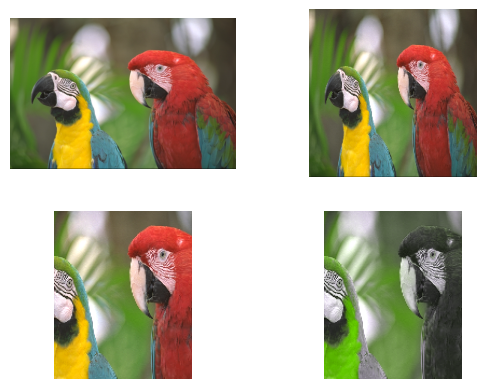

In [79]:
plt.subplot(2, 2, 1)
bird_s=convey_img(bird) #try to command this line, see what happens.
plt.imshow(bird_s)
plt.axis('off')

plt.subplot(2, 2, 2)
resize_img_s=convey_img(resize_img) #try to command this line, see what happens.
plt.imshow(resize_img_s)
plt.axis('off')

plt.subplot(2, 2, 3)
center_crop_s=convey_img(center_crop) #try to command this line, see what happens.
plt.imshow(center_crop_s)
plt.axis('off')

plt.subplot(2, 2, 4)
copy_img_s=convey_img(copy_img) #try to command this line, see what happens.
plt.imshow(copy_img_s)
plt.axis('off')

plt.show()

(6) A camera with a sensor size of 20 x 30 mm (which corresponds to a 200 x 300 pixel image) is aligned with a flat surface. An object which is 12 cm tall is placed at a distance of 60 cm from the camera to produce the image shown below. The top of the object is exactly aligned with the top edge of the image (the object is 100px high in the image). You can assume the optical centre of the camera is in the centre of the image. What is the focal length of the camera?

<img src="https://github.com/1uoyuuu/COMP90086-CV/blob/main/tutorial/week2/focal.png?raw=1" style="height:400px">

$ \frac{\text{image height}}{\text{focal lenth}} = \frac{\text{object height}}{\text{object distance}}$

$f = \frac{10mm\times 600mm}{120mm}$

$f = 50 mm$